In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [2]:
def computeCode(start, dims, a):
    xmin, ymin = start
    xmax, ymax = xmin + dims[0], ymin + dims[1]
    code = 0
    x, y = a
    if x < xmin:
        code += 1
    elif x > xmax:
        code += 2
    if y < ymin:
        code += 4
    elif y > ymax:
        code += 8
    return code

def clipLine(start, dims, a, b):
    try:
        xmin, ymin = start
        xmax, ymax = xmin + dims[0], ymin + dims[1]
        (x1, y1), (x2, y2) = a, b
        code1 = computeCode(start, dims, a)
        code2 = computeCode(start, dims, b)
        res = False
        while True:
            if (code1 & code2):
                break
            elif not (code1 | code2):
                res = True
                break
            else:
                m = (y2 - y1) / (x2 - x1)
                x, y = None, None
                outsidePtCode = code1 if code1 > code2 else code2
                if outsidePtCode & 1:
                    y = y1 + m * (xmin - x1)
                    x = xmin
                elif outsidePtCode & 2:
                    y = y1 + m * (xmax - x1)
                    x = xmax
                elif outsidePtCode & 4:
                    x = x1 + (ymin - y1) / m
                    y = ymin
                else:
                    x = x1 + (ymax - y1) / m
                    y = ymax

                if outsidePtCode == code1:
                    x1, y1 = x, y
                    code1 = computeCode(start, dims, (x1, y1))
                else:
                    x2, y2 = x, y
                    code2 = computeCode(start, dims, (x2, y2))
    #             print(x1, y1, x2, y2, code1, code2)
        if res:
            print("Visible portion of line:", (x1, y1), "to", (x2, y2))
        else:
            print("Line not visible")
        plt.figure(figsize=(5, 5))
        plt.gca().add_patch(plt.Rectangle(start, dims[0], dims[1], fc="white", ec="black"))
        plt.plot((a[0], b[0]), (a[1], b[1]))
        plt.xlim(-10, 110)
        plt.ylim(-10, 110)
        plt.show()
    except:
        print("Make sure x1 != x2 and y1 != y2")

Clipping Window
Start point: (26, 49)
Dimensions: (44, 47)
Line Endpoints
(91, 81)
(63, 50)
Visible portion of line: (70, 57.75) to (63, 50)


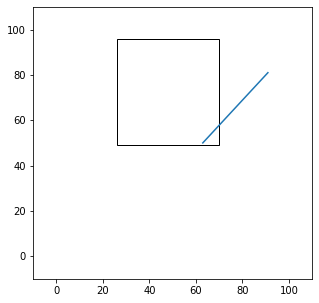

In [14]:
start = tuple(random.sample(range(1, 50), 2))
dims = tuple(random.sample(range(1, 50), 2))
a = tuple(random.sample(range(1, 100), 2))
b = tuple(random.sample(range(1, 100), 2))
print("Clipping Window")
print("Start point:", start)
print("Dimensions:", dims)
print("Line Endpoints")
print(a)
print(b)
clipLine(start, dims, a, b)